In [2]:
from typing import Annotated, List, Dict, Any
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage

print("Imports Successful")

Imports Successful


In [3]:
class MoodState(TypedDict):
    messages: Annotated[List, add_messages]

In [32]:
def route(state: MoodState) -> str:
    last_message = state['messages'][-1].content.lower()
    if any(word in last_message for word in ['happy', 'good', 'great', 'fantastic', 'awesome']):
        return "happy"
    if any(word in last_message for word in ["sad", "tired", "down", "frustrated", "gloomy"]):
        return "sad"
    return "happy"
print("Router Function Setup")

Router Function Setup


In [33]:
def happy_mood(state: MoodState) -> Dict[str, Any]:
    response = "Yay! you’re happy"
    return {'messages': [AIMessage(content=response)]}
print("Happy Mood Function Defined")

Happy Mood Function Defined


In [34]:
def sad_mood(state: MoodState) -> Dict[str, Any]:
    response = "Sorry you’re sad"
    return {'messages': [AIMessage(content=response)]}
print("Sad Mood Function Defined")

Sad Mood Function Defined


In [35]:
graph = StateGraph(MoodState)
graph.add_node("happy_mood", happy_mood)
graph.add_node("sad_mood", sad_mood)

graph.add_conditional_edges(
    START,
    route,
    {'happy': "happy_mood", "sad": "sad_mood"}
)
graph.add_edge("happy_mood", END)
graph.add_edge("sad_mood", END)
app = graph.compile()

print("Graph Compiled!")

Graph Compiled!


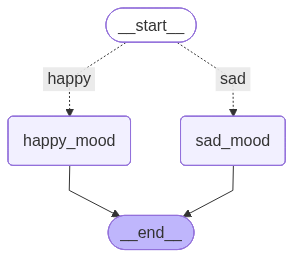

In [36]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [37]:
state: MoodState = {
    "messages": [HumanMessage(content="I'm Very sad")],
}
state = app.invoke(state)
print("\n--- Response 1 ---")
for m in state["messages"]:
    print(m.__class__.__name__, ":", m.content)


--- Response 1 ---
HumanMessage : I'm Very sad
AIMessage : Sorry you’re sad
